# Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
import seaborn as sns

In [ ]:
import numpy as np
import statsmodels.api as sm
sns.set()
from sklearn.cluster import KMeans
from statistics import mean

# Load Dataset

In [3]:
visitors = pd.read_csv('https://tinyurl.com/ChrisCoDV/001157689/VenueDailyVisitors.csv', index_col=0)

In [87]:
visitors.head(5)

,VRD,TRV,YVW,TLJ,ZFX,CWN,VLS,BEY,SJU,AXM,...,UFY,XJT,PXI,SPF,GLQ,XXO,WRL,QRY,CQC,YRU
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,62,79,0,85,79,301,72,213,571,65,...,59,62,519,502,65,97,87,299,223,60
2019-01-02,60,63,0,81,89,255,63,215,548,48,...,70,74,549,547,54,90,73,244,178,73
2019-01-03,64,74,0,78,96,238,62,169,463,43,...,70,84,391,391,56,105,74,218,150,86
2019-01-04,59,80,0,71,86,150,55,149,385,56,...,76,101,344,389,61,95,74,138,104,74
2019-01-05,61,78,0,87,95,157,64,157,392,66,...,65,55,338,266,49,79,75,213,85,72


In [5]:
age = pd.read_csv('https://tinyurl.com/ChrisCoDV/001157689/VenueAge.csv', index_col=0)

In [6]:
age.head(5)

,Avg age (yrs)
Id,
VRD,21
TRV,36
YVW,30
TLJ,43
ZFX,38


In [7]:
max_distance = pd.read_csv('https://tinyurl.com/ChrisCoDV/001157689/VenueDistance.csv', index_col=0)

In [8]:
max_distance.head(5)

,Max travel distance (mls)
Id,
VRD,8
TRV,10
YVW,2
TLJ,6
ZFX,13


In [9]:
duration = pd.read_csv('https://tinyurl.com/ChrisCoDV/001157689/VenueDuration.csv', index_col=0)

In [10]:
duration.head(5)

,Avg visit duration (mins)
Id,
VRD,76
TRV,134
YVW,69
TLJ,138
ZFX,141


In [11]:
female = pd.read_csv('https://tinyurl.com/ChrisCoDV/001157689/VenueGender.csv', index_col=0)

In [12]:
female.head(5)

,Proportion Female (%)
Id,
VRD,41
TRV,53
YVW,48
TLJ,56
ZFX,57


In [13]:
spend = pd.read_csv('https://tinyurl.com/ChrisCoDV/001157689/VenueSpend.csv', index_col=0)

In [14]:
spend.head(5)

,Avg spend (£)
Id,
VRD,16
TRV,17
YVW,20
TLJ,30
ZFX,26


# Data Preprocessing

In [16]:
visitors_with_sum = pd.read_csv('https://tinyurl.com/ChrisCoDV/001157689/VenueDailyVisitors.csv', index_col=0)
visitors_with_sum["visitors_sum"] = visitors_with_sum.sum(axis = 1)

In [17]:
visitors_with_sum.head()

,VRD,TRV,YVW,TLJ,ZFX,CWN,VLS,BEY,SJU,AXM,...,XJT,PXI,SPF,GLQ,XXO,WRL,QRY,CQC,YRU,visitors_sum
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,62,79,0,85,79,301,72,213,571,65,...,62,519,502,65,97,87,299,223,60,5783
2019-01-02,60,63,0,81,89,255,63,215,548,48,...,74,549,547,54,90,73,244,178,73,5600
2019-01-03,64,74,0,78,96,238,62,169,463,43,...,84,391,391,56,105,74,218,150,86,4842
2019-01-04,59,80,0,71,86,150,55,149,385,56,...,101,344,389,61,95,74,138,104,74,4233
2019-01-05,61,78,0,87,95,157,64,157,392,66,...,55,338,266,49,79,75,213,85,72,4041


In [90]:
visitors2 = visitors.T
visitors2.head()

Date,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
VRD,62,60,64,59,61,66,62,60,69,63,...,63,58,61,70,65,61,57,69,62,66
TRV,79,63,74,80,78,80,83,81,81,71,...,75,75,77,66,80,66,68,67,68,71
YVW,0,0,0,0,0,0,0,0,0,0,...,27,67,110,131,122,83,151,67,90,29
TLJ,85,81,78,71,87,69,108,65,76,62,...,89,78,100,91,98,74,84,61,97,102
ZFX,79,89,96,86,95,95,100,76,86,69,...,116,97,107,105,97,78,86,84,110,105


In [91]:
visitors2["visitors_sum"] = visitors2.sum(axis = 1)

In [101]:
visitors2.head()

Date,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,visitors_sum
VRD,62,60,64,59,61,66,62,60,69,63,...,58,61,70,65,61,57,69,62,66,22993
TRV,79,63,74,80,78,80,83,81,81,71,...,75,77,66,80,66,68,67,68,71,27440
YVW,0,0,0,0,0,0,0,0,0,0,...,67,110,131,122,83,151,67,90,29,4726
TLJ,85,81,78,71,87,69,108,65,76,62,...,78,100,91,98,74,84,61,97,102,30236
ZFX,79,89,96,86,95,95,100,76,86,69,...,97,107,105,97,78,86,84,110,105,34511


In [20]:
gender = pd.read_csv('https://tinyurl.com/ChrisCoDV/001157689/VenueGender.csv', index_col=0)

In [21]:
gender["Proportion Male (%)"] = 100 - gender["Proportion Female (%)"]

In [22]:
gender.head(5)

,Proportion Female (%),Proportion Male (%)
Id,,
VRD,41,59
TRV,53,47
YVW,48,52
TLJ,56,44
ZFX,57,43


In [23]:
data = age.join(duration).join(max_distance).join(spend).join(gender)

In [24]:
data.head(5)

,Avg age (yrs),Avg visit duration (mins),Max travel distance (mls),Avg spend (£),Proportion Female (%),Proportion Male (%)
Id,,,,,,
VRD,21,76,8,16,41,59
TRV,36,134,10,17,53,47
YVW,30,69,2,20,48,52
TLJ,43,138,6,30,56,44
ZFX,38,141,13,26,57,43


In [102]:
summary_data = pd.DataFrame(index=visitors.columns)
summary_data['Yearly Sales'] = visitors2['visitors_sum'] * data['Avg spend (£)'].values

print(summary_data.head())

     Yearly Sales
VRD        367888
TRV        466480
YVW         94520
TLJ        907080
ZFX        897286


# Seasonal Behaviour

In [25]:
visitors_with_sum.columns

Index(['VRD', 'TRV', 'YVW', 'TLJ', 'ZFX', 'CWN', 'VLS', 'BEY', 'SJU', 'AXM',
       'ZPL', 'AEQ', 'ZLH', 'RDA', 'XLA', 'YDI', 'WDZ', 'BQV', 'YXF', 'BKI',
       'QJL', 'ZJB', 'PDT', 'XPE', 'DKS', 'WXV', 'WFI', 'XFP', 'UZO', 'AWF',
       'UFY', 'XJT', 'PXI', 'SPF', 'GLQ', 'XXO', 'WRL', 'QRY', 'CQC', 'YRU',
       'visitors_sum'],
      dtype='object')

## Here we can see that the seasonal beahviour is not that much fluctuating from it's normal frequency, but at the end of the year it has sightly increased.

Text(0, 0.5, 'Visitors')

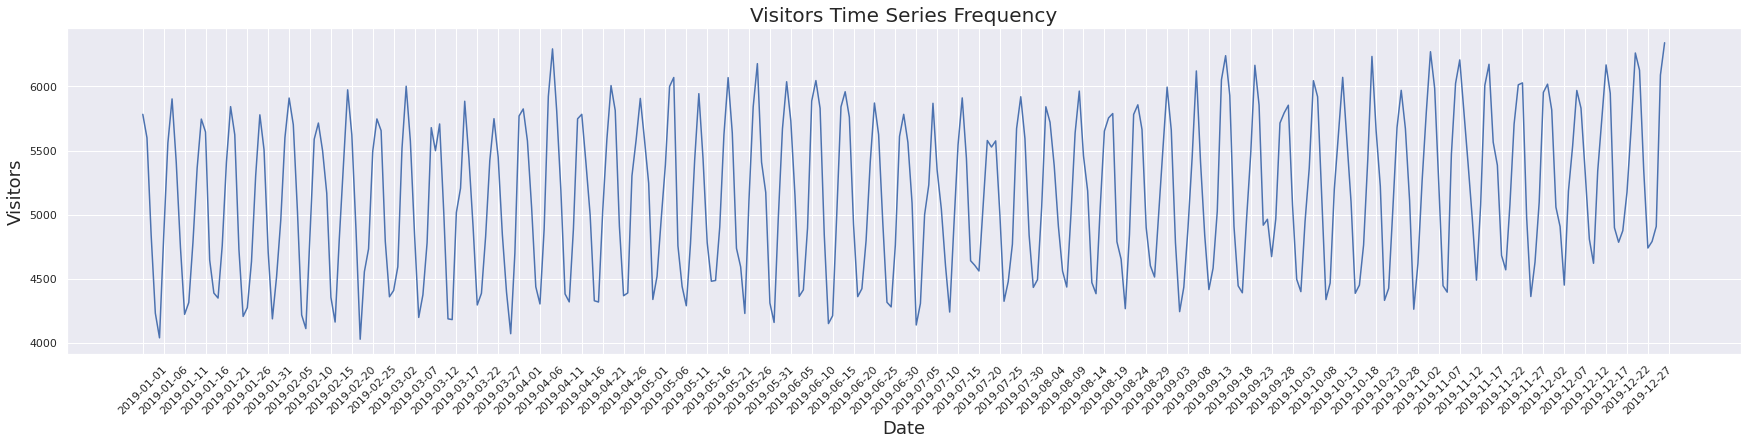

In [119]:
plt.figure(figsize=(30, 6))
plt.plot(visitors_with_sum.index[:365], visitors_with_sum.visitors_sum[:365])
plt.title('Visitors Time Series Frequency', fontsize=20)
plt.xticks(rotation=45)
x = np.random.randint(low=0, high=50, size=365)
plt.xticks(np.arange(0, len(x)+1, 5))
plt.xlabel('Date', fontsize=18)
plt.ylabel('Visitors', fontsize=18)

In [27]:
visitors_with_sum.index

Index(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05',
       '2019-01-06', '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
       ...
       '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
       '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30', '2019-12-31'],
      dtype='object', name='Date', length=365)

# Visualizaing The Correlation

In [28]:
age_and_spend = age.join(spend)

In [29]:
age_and_spend.head(5)

,Avg age (yrs),Avg spend (£)
Id,,
VRD,21,16
TRV,36,17
YVW,30,20
TLJ,43,30
ZFX,38,26


In [30]:
age_and_spend.shape

(40, 2)

## Here we can see that there are correleations between several venues from the heatmap of visitors in each venue

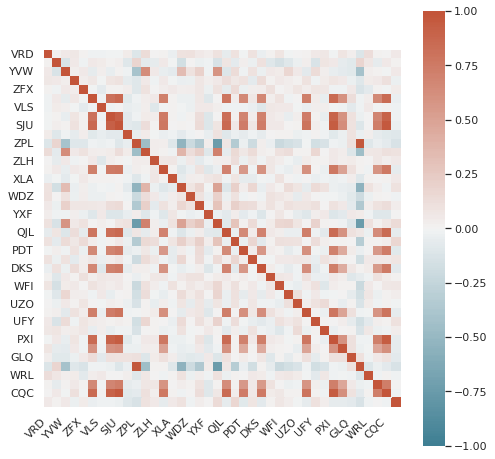

In [31]:
plt.figure(figsize=(8, 8))
corr = visitors.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

## To know more about the correlation amongst the data we will visualize the pairplot

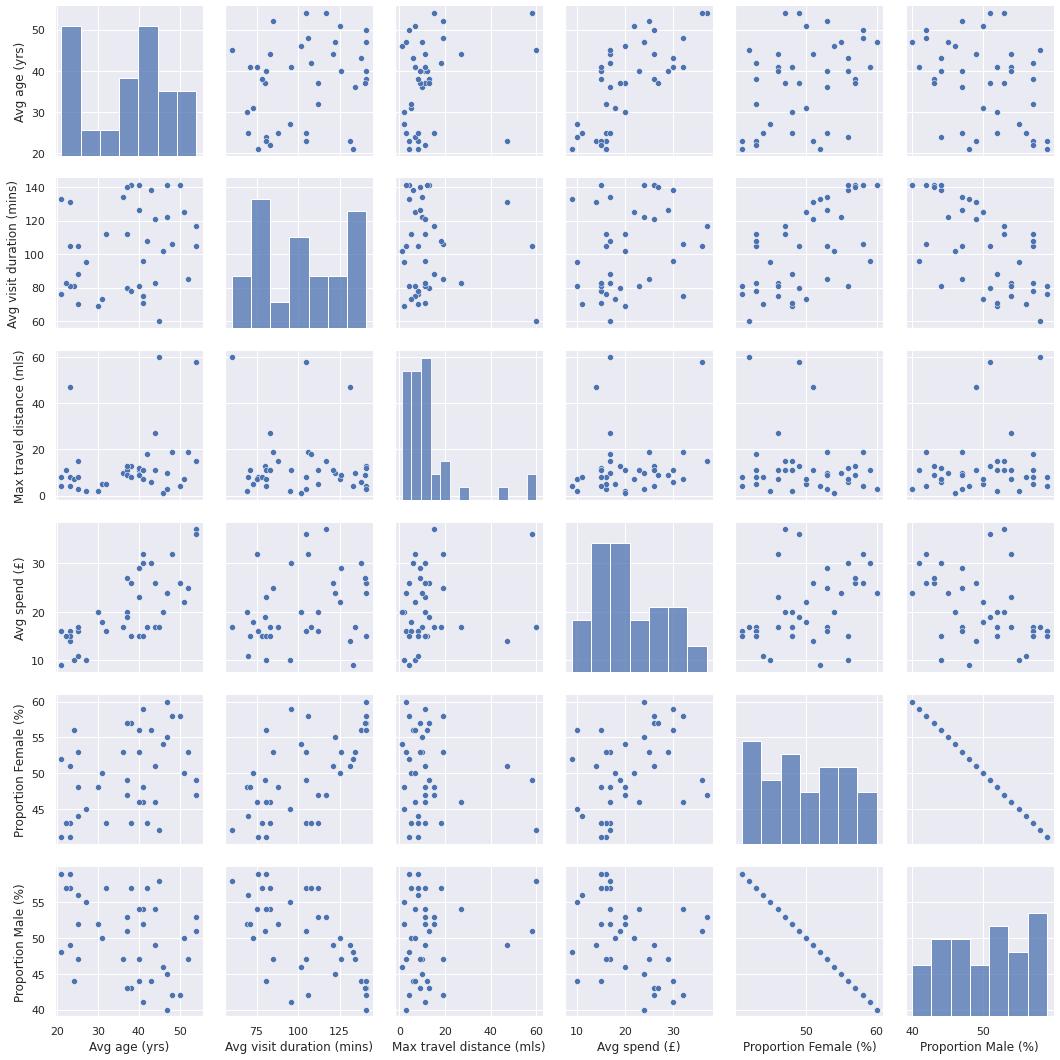

In [32]:
sns.pairplot(data)

## From the pairplot we have found some correlations and will analyze them furthur in the next visualizations

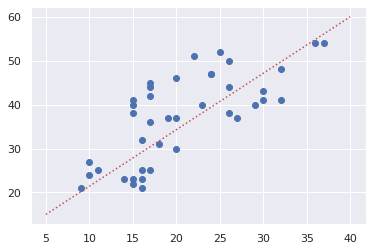

In [59]:
plt.scatter(spend['Avg spend (£)'], age['Avg age (yrs)'])
plt.plot([5, 40], [15, 60], linestyle=':', color='r',
        label='price = cost (zero profit)')

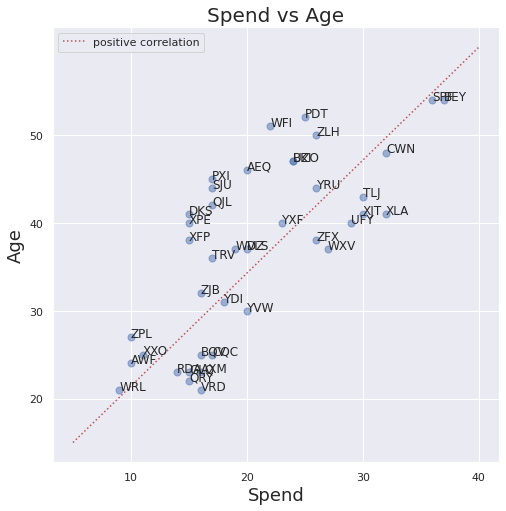

In [52]:
plt.figure(figsize=(8, 8))
plt.scatter(data['Avg spend (£)'], data['Avg age (yrs)'],
         s=50, alpha=0.5)
plt.xticks([10, 20, 30, 40, 50])
plt.yticks([10, 20, 30, 40, 50])
plt.title('Spend vs Age', fontsize=20)
plt.xlabel('Spend', fontsize=18)
plt.ylabel('Age', fontsize=18)
for i, name in enumerate(data.index):
    plt.annotate(name, (data['Avg spend (£)'][i], data['Avg age (yrs)'][i]))
plt.plot([5, 40], [15, 60], linestyle=':', color='r',
        label='positive correlation')
plt.legend(loc=2)
plt.show()

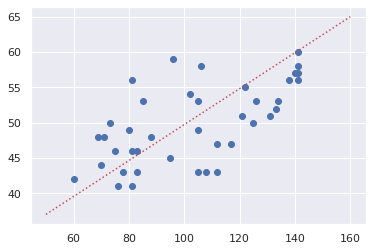

In [70]:
plt.scatter(duration['Avg visit duration (mins)'], gender['Proportion Female (%)'])
plt.plot([50, 160], [37, 65], linestyle=':', color='r',
        label='price = cost (zero profit)')

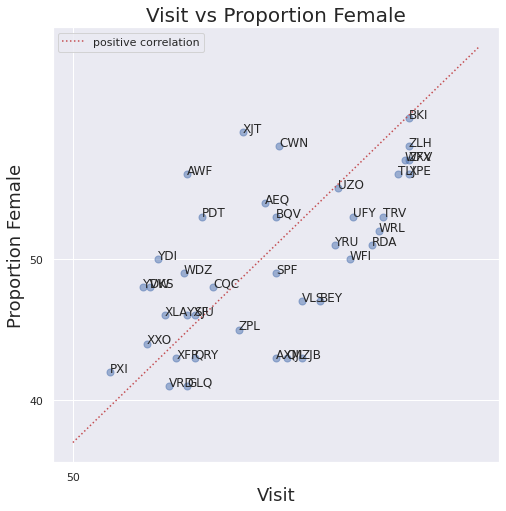

In [71]:
plt.figure(figsize=(8, 8))
plt.scatter(data['Avg visit duration (mins)'], data['Proportion Female (%)'],
         s=50, alpha=0.5)
plt.xticks([10, 20, 30, 40, 50])
plt.yticks([10, 20, 30, 40, 50])
plt.title('Visit vs Proportion Female', fontsize=20)
plt.xlabel('Visit', fontsize=18)
plt.ylabel('Proportion Female', fontsize=18)
for i, name in enumerate(data.index):
    plt.annotate(name, (data['Avg visit duration (mins)'][i], data['Proportion Female (%)'][i]))
plt.plot([50, 160], [37, 65], linestyle=':', color='r',
        label='positive correlation')
plt.legend(loc=2)
plt.show()

# Visualizing The Clusters

In [38]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [39]:
identified_clusters = kmeans.fit_predict(data)
identified_clusters

array([1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 1, 1, 2, 1, 1, 2], dtype=int32)

## To visualize the clusters amongst the data we will visualize the pairplot

In [40]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters

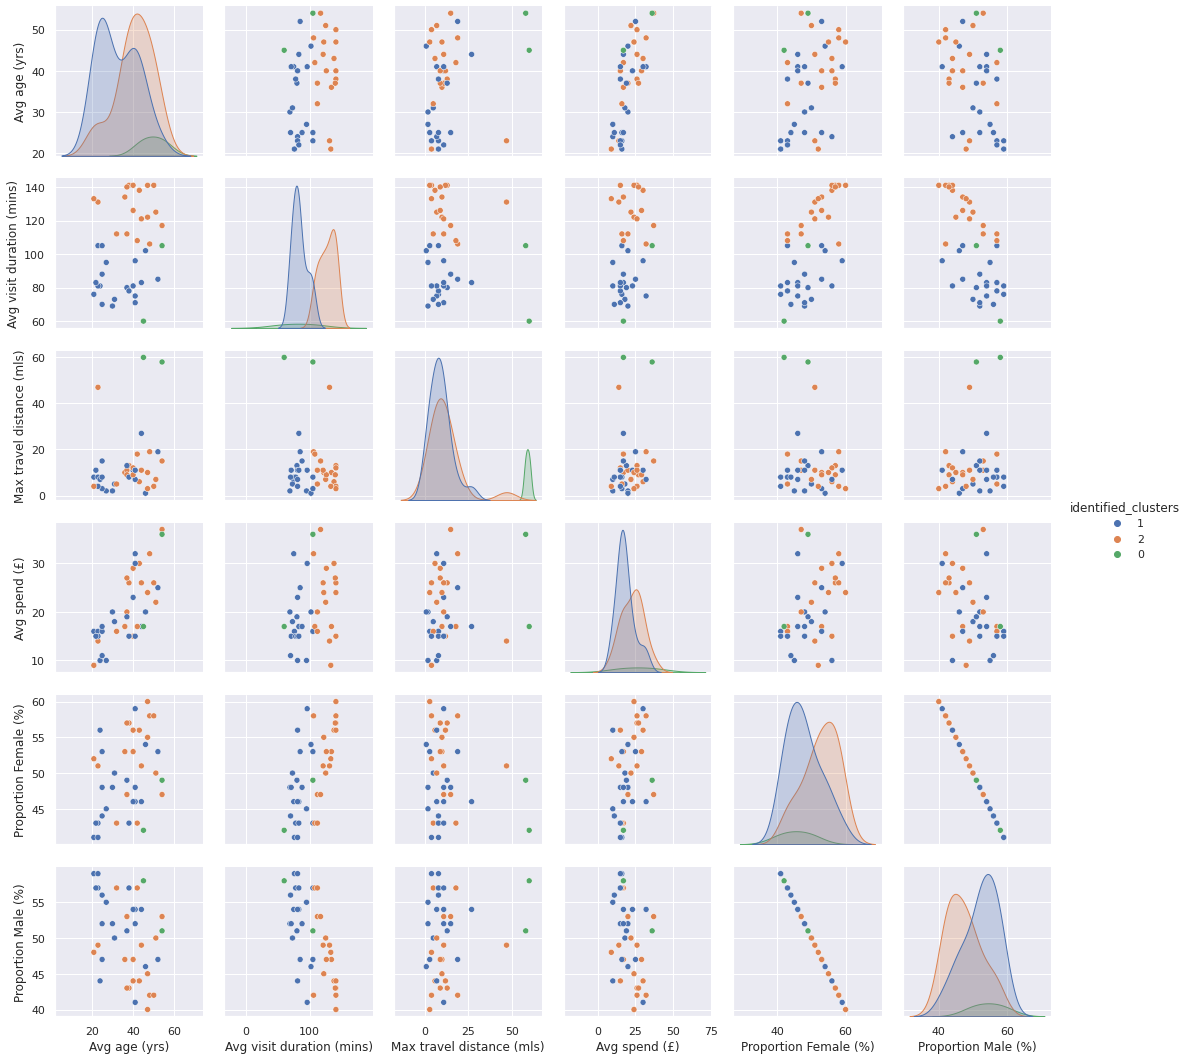

In [41]:
data['identified_clusters'] = identified_clusters
data['identified_clusters']= data['identified_clusters'].values.astype(str)
sns.pairplot(data, hue = 'identified_clusters')

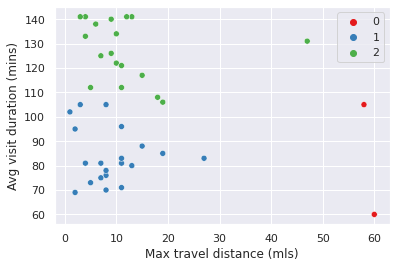

In [42]:
sns.scatterplot(x = 'Max travel distance (mls)', y = 'Avg visit duration (mins)' , hue = identified_clusters ,data = data, palette = 'Set1')

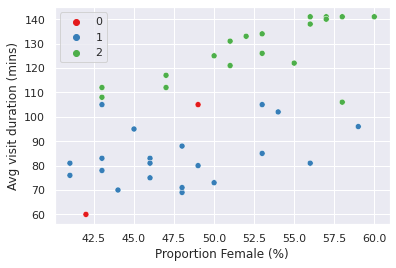

In [48]:
sns.scatterplot(x = 'Proportion Female (%)', y = 'Avg visit duration (mins)', hue = identified_clusters ,data = data, palette = 'Set1')

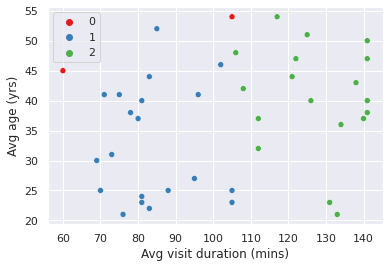

In [44]:
sns.scatterplot(x = 'Avg visit duration (mins)', y = 'Avg age (yrs)' , hue = identified_clusters ,data = data, palette = 'Set1')

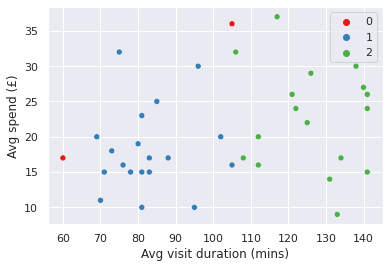

In [45]:
sns.scatterplot(x = 'Avg visit duration (mins)', y = 'Avg spend (£)' , hue = identified_clusters ,data = data, palette = 'Set1')

Text(0, 0.5, 'WCSS')

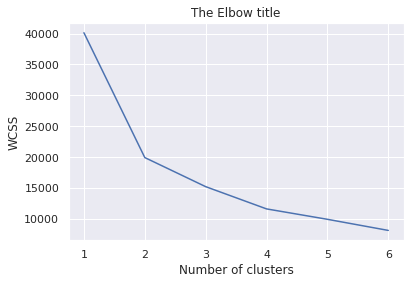

In [46]:
wcss=[]
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(data)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')